# Optimizer
Gets data and uses it to optimize a method (imported from method.py) using a loss function and tests it against unseen data.
TODO:
- Cross Validation implementation


In [757]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

# Import data

In [758]:
### Load the data
data_path = 'data/data_complete_2022-06-09.csv'
df = pd.read_csv(data_path)

# Scale Data

In [759]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)
y = X[:,-1]
x = X[:,:-1]

In [760]:
x

array([[ 0.46214252, -0.07387218,  0.77339749, ...,  0.13553882,
        -0.63377728,  0.56679165],
       [ 0.44254906,  0.07437134,  0.87610416, ...,  1.94786151,
         0.6931939 , -0.33417059],
       [ 0.46214252,  0.16806124,  0.7538091 , ..., -1.55985983,
        -0.63377728, -0.70698256],
       ...,
       [-1.06418822, -0.3086899 ,  0.12221604, ...,  1.07093118,
         0.6931939 , -0.17883227],
       [-1.02500129,  0.08860271, -0.62267202, ..., -0.62446747,
         0.6931939 ,  1.34348325],
       [-1.06418822,  0.13722659, -0.75661422, ..., -4.19065084,
        -0.63377728,  1.93376886]])

# Cross Validation Split #TODO

# Train Test Split

In [761]:
from sklearn.model_selection import train_test_split
dtype = torch.float
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train = torch.tensor(x_train,dtype=dtype)
x_test = torch.tensor(x_test, dtype=dtype)
y_test = torch.tensor(y_test, dtype=dtype).reshape(-1,1)
y_train = torch.tensor(y_train, dtype=dtype).reshape(-1,1)

# Train

Epoch: 0, train loss: 1.2108954191207886, test loss: 0.9960529208183289
Epoch: 100, train loss: 0.949776828289032, test loss: 1.0288408994674683
Epoch: 200, train loss: 0.9477390050888062, test loss: 1.0388519763946533
Epoch: 300, train loss: 0.9474000930786133, test loss: 1.041847586631775
Epoch: 400, train loss: 0.9472910761833191, test loss: 1.0430020093917847
Epoch: 500, train loss: 0.9472619891166687, test loss: 1.0436269044876099
Epoch: 600, train loss: 0.9472562074661255, test loss: 1.0439358949661255
Epoch: 700, train loss: 0.9472551345825195, test loss: 1.0440672636032104
Epoch: 800, train loss: 0.9472549557685852, test loss: 1.0441155433654785
Epoch: 900, train loss: 0.9472549557685852, test loss: 1.0441309213638306


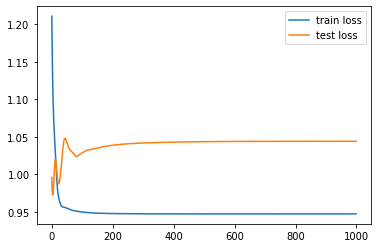

In [762]:
import time
from torch.optim.lr_scheduler import ExponentialLR
from methods import *
from torch import nn

epochs = 1000
#seed=3
#torch.manual_seed(seed)
method = Linear(input_size=x_train.shape[1])
criterion = nn.MSELoss()
params_to_be_optimized = method.get_parameters()
optimizer = optim.Adam(params_to_be_optimized, lr=0.01)
#scheduler = ExponentialLR(optimizer, gamma=0.999)
train_losses = []
test_losses = []

for epoch in range(epochs):
  iteration_time = time.time()
  optimizer.zero_grad()

  # forward pass
  y_train_predicted = method.predict(x_train)
  loss = criterion(y_train_predicted, y_train)

  # backward pass
  loss.backward()
  optimizer.step()
  #scheduler.step()


  with torch.no_grad():

    y_train_predicted = method.predict(x_train)
    train_loss = criterion(y_train_predicted, y_train)
    train_losses.append(train_loss)

    y_test_predicted = method.predict(x_test)
    test_loss = criterion(y_test_predicted, y_test)
    test_losses.append(test_loss)

    if epoch%100==0:
      print(f'Epoch: {epoch}, train loss: {train_loss}, test loss: {test_loss}')

plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

# Test results

In [763]:
# Rescale test result to original values
zeros = np.zeros(x_test.shape)
test_predicted = np.concatenate((zeros, method.predict(x_test).detach().numpy()),axis=1)
test_predicted= scaler.inverse_transform(test_predicted)[:,-1]

test_target = np.concatenate((zeros, y_test.detach().numpy()),axis=1)
test_target = scaler.inverse_transform(test_target)[:,-1]

In [764]:
# Calculate percentage error
percentage_error = np.abs((test_target - test_predicted)/test_target)

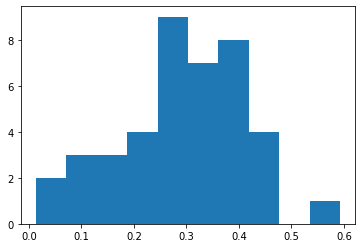

In [765]:
# Plot histogram of percentage error
plt.hist(percentage_error)
plt.show()